# Proyecto Integrado 2020-02

* Arcia Jesus Albero
* Fajardo Daian Paola
* Salazar Carlos Enrique
* Sepulveda Jimenez Hernan

## Importar Librerias
***

In [42]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import seaborn as sns
import random
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [43]:
#Visualizar filas y columnas completas de los dataframe de Pandas
pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)
pd.set_option("max_colwidth", None)

## Importar DataSet
***

In [44]:
hurtos_moto = pd.read_csv('https://raw.githubusercontent.com/jaarciah/Proyecto-Integrador-2020-periodo-2/master/Data/Raw/hurto_de_moto.csv', sep = ";")
hurtos_moto.columns = hurtos_moto.columns.str.replace('[#,@,&,","]', '')
hurtos_moto.replace({'[#,@,&,","]':''},regex=True,inplace=True)
hurtos_moto.head()

C:\Users\Paola Fajardo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,ocupacion,discapacidad,grupo_especial,medio_transporte,nivel_academico,testigo,conducta,modalidad,caracterizacion,conducta_especial,arma_medio,articulo_penal,categoria_penal,nombre_barrio,codigo_barrio,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida
0,2017-01-01 23:00:00,1.0,6.268040,-75.549892,Hombre,29,Soltero(a),Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Caminata,Sin dato,Sin dato,Hurto de moto,Halado,Sin dato,No,Llave maestra,Sin dato,Sin dato,El Pomar,0306,3,Vía pública,Manrique,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2014,Azul,Sin dato,Sin dato
1,2017-01-01 20:30:00,1.0,6.290076,-75.556893,Hombre,22,Unión marital de hecho,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Motocicleta,Sin dato,Sin dato,Hurto de moto,Atraco,Sin dato,No,Arma cortopunzante,Sin dato,Sin dato,La Rosa,0211,2,Vía pública,Santa Cruz,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2005,Rojo,Sin dato,Sin dato
2,2017-01-01 07:00:00,1.0,6.304187,-75.551760,Hombre,23,Unión marital de hecho,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Caminata,Sin dato,Sin dato,Hurto de moto,Halado,Sin dato,No,Llave maestra,Sin dato,Sin dato,La Isla,0201,2,Vía pública,Santa Cruz,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2011,Verde,Sin dato,Sin dato
3,2017-01-01 09:00:00,1.0,6.248002,-75.574849,Hombre,-1,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Motocicleta,Sin dato,Sin dato,Hurto de moto,Atraco,Sin dato,Sin dato,Arma de fuego,Sin dato,Sin dato,Guayaquil,1007,10,Almacén tienda y otro,Candelaria,Moto,Vehículos de 2 o 4 ruedas,Vehículo,-1,Negro,Sin dato,Sin dato
4,2017-01-01 16:30:00,1.0,6.268129,-75.557882,Hombre,34,Soltero(a),Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Caminata,Sin dato,Sin dato,Hurto de moto,Halado,Sin dato,No,Llave maestra,Sin dato,Sin dato,Manrique Central No.1,0409,4,Parqueadero,Aranjuez,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2015,Negro,Sin dato,Sin dato


In [45]:
hurtos_moto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64869 entries, 0 to 64868
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fecha_hecho          64869 non-null  object 
 1   cantidad             64869 non-null  float64
 2   latitud              53231 non-null  float64
 3   longitud             53231 non-null  float64
 4   sexo                 64869 non-null  object 
 5   edad                 64869 non-null  int64  
 6   estado_civil         64869 non-null  object 
 7   grupo_actor          64869 non-null  object 
 8   actividad_delictiva  64869 non-null  object 
 9   parentesco           64869 non-null  object 
 10  ocupacion            64869 non-null  object 
 11  discapacidad         64869 non-null  object 
 12  grupo_especial       64869 non-null  object 
 13  medio_transporte     64869 non-null  object 
 14  nivel_academico      64869 non-null  object 
 15  testigo              64869 non-null 

#### *Colocar explicitamente las variables de fecha en el dataset*

In [46]:
hurtos_moto['fecha_hecho'] = hurtos_moto['fecha_hecho'].astype('datetime64')

In [47]:
hurtos_moto['fecha'] =  hurtos_moto["fecha_hecho"].dt.date
hurtos_moto["fecha"]= pd.to_datetime(hurtos_moto["fecha"]) 
hurtos_moto['fecha'] = hurtos_moto['fecha'].dt.strftime('%d-%m-%Y')

In [48]:
hurtos_moto['anho'] = hurtos_moto['fecha_hecho'].dt.year
hurtos_moto['mes'] = hurtos_moto['fecha_hecho'].dt.month
hurtos_moto['dia'] = hurtos_moto['fecha_hecho'].dt.day
hurtos_moto['dia_semana'] = hurtos_moto['fecha_hecho'].dt.dayofweek
hurtos_moto['hora'] = hurtos_moto['fecha_hecho'].dt.hour
hurtos_moto['hora_min_sec'] = pd.to_datetime(hurtos_moto['fecha_hecho']).dt.time

In [49]:
holidays = pd.read_csv("festivos.csv", sep=",")
holidays = holidays.rename(columns={"Date": "festivos"})

In [50]:
hurtos_moto = pd.merge(hurtos_moto, holidays, left_on = 'fecha', right_on = 'festivos', how = 'left' )

In [51]:
hurtos_moto[['festivos']] = np.where(hurtos_moto[['festivos']].isnull(), 0, 1)

In [52]:
del hurtos_moto['Description']

In [53]:
quincena = [
            (hurtos_moto['dia'] >= 14) & (hurtos_moto['dia'] <= 16),
            (hurtos_moto['dia'] >= 28) & (hurtos_moto['dia'] <= 31),
            (hurtos_moto['dia'] >= 1) & (hurtos_moto['dia'] <= 2)
    ]

values = [1, 1, 1]

hurtos_moto['quincena'] = np.select(quincena, values)

In [54]:
hurtos_moto['week_number'] = hurtos_moto['fecha_hecho'].dt.week 

ferias_fiestas = [
            (hurtos_moto['mes'] == 8) & (hurtos_moto['week_number'] >= 31) & (hurtos_moto['week_number'] <= 32), #Feria de las flores
            (hurtos_moto['mes'] == 7) & (hurtos_moto['week_number'] == 4), #La fiesta del tamarindo
            (hurtos_moto['mes'] >= 12) & (hurtos_moto['dia'] >= 10) & (hurtos_moto['dia'] <= 22), #Fiesta de los Diablitos
            (hurtos_moto['mes'] >= 6) & (hurtos_moto['week_number'] == 4), #Festival Internacional del Tango
            (hurtos_moto['mes'] == 9) & (hurtos_moto['week_number'] >= 36) & (hurtos_moto['week_number'] <= 37),  #Festival Internacional del Jazz
            (hurtos_moto['mes'] >= 10) & (hurtos_moto['dia'] >= 17), #Festival Del Humor     
            (hurtos_moto['mes'] >= 12) & (hurtos_moto['week_number'] == 7), #Desfile de Danzas, Mitos y Leyendas
            (hurtos_moto['week_number'] >= 26) & (hurtos_moto['week_number'] <= 30) #ColombiaModa
    ]

values = [1, 1, 1,1, 1, 1,1,1]

hurtos_moto['ferias_fiestas'] = np.select(ferias_fiestas, values)             

In [55]:
hurtos_moto.head()

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,ocupacion,discapacidad,grupo_especial,medio_transporte,nivel_academico,testigo,conducta,modalidad,caracterizacion,conducta_especial,arma_medio,articulo_penal,categoria_penal,nombre_barrio,codigo_barrio,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha,anho,mes,dia,dia_semana,hora,hora_min_sec,festivos,quincena,week_number,ferias_fiestas
0,2017-01-01 23:00:00,1.0,6.268040,-75.549892,Hombre,29,Soltero(a),Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Caminata,Sin dato,Sin dato,Hurto de moto,Halado,Sin dato,No,Llave maestra,Sin dato,Sin dato,El Pomar,0306,3,Vía pública,Manrique,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2014,Azul,Sin dato,Sin dato,01-01-2017,2017,1,1,6,23,23:00:00,1,1,52,0
1,2017-01-01 20:30:00,1.0,6.290076,-75.556893,Hombre,22,Unión marital de hecho,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Motocicleta,Sin dato,Sin dato,Hurto de moto,Atraco,Sin dato,No,Arma cortopunzante,Sin dato,Sin dato,La Rosa,0211,2,Vía pública,Santa Cruz,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2005,Rojo,Sin dato,Sin dato,01-01-2017,2017,1,1,6,20,20:30:00,1,1,52,0
2,2017-01-01 07:00:00,1.0,6.304187,-75.551760,Hombre,23,Unión marital de hecho,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Caminata,Sin dato,Sin dato,Hurto de moto,Halado,Sin dato,No,Llave maestra,Sin dato,Sin dato,La Isla,0201,2,Vía pública,Santa Cruz,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2011,Verde,Sin dato,Sin dato,01-01-2017,2017,1,1,6,7,07:00:00,1,1,52,0
3,2017-01-01 09:00:00,1.0,6.248002,-75.574849,Hombre,-1,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Motocicleta,Sin dato,Sin dato,Hurto de moto,Atraco,Sin dato,Sin dato,Arma de fuego,Sin dato,Sin dato,Guayaquil,1007,10,Almacén tienda y otro,Candelaria,Moto,Vehículos de 2 o 4 ruedas,Vehículo,-1,Negro,Sin dato,Sin dato,01-01-2017,2017,1,1,6,9,09:00:00,1,1,52,0
4,2017-01-01 16:30:00,1.0,6.268129,-75.557882,Hombre,34,Soltero(a),Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Caminata,Sin dato,Sin dato,Hurto de moto,Halado,Sin dato,No,Llave maestra,Sin dato,Sin dato,Manrique Central No.1,0409,4,Parqueadero,Aranjuez,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2015,Negro,Sin dato,Sin dato,01-01-2017,2017,1,1,6,16,16:30:00,1,1,52,0


## *Individual variables*
***

In [31]:
#Conteo de Robos por año
hurtos_moto.groupby(['anho'])['anho'].count()

anho
2003    4516
2004    3190
2005    2717
2006    2538
2007    2141
2008    2128
2009    3341
2010    2287
2011    4947
2012    5095
2013    4924
2014    4668
2015    4376
2016    5126
2017    3982
2018    4813
2019    4080
Name: anho, dtype: int64

In [32]:
#Conteo por genero
hurtos_moto.groupby(['sexo'])['sexo'].count()

sexo
Hombre      52762
Mujer       10447
Sin dato     1660
Name: sexo, dtype: int64

In [33]:
#Conteo por genero por año
hurtos_moto.groupby(["anho", "sexo"]).size()

anho  sexo    
2003  Hombre      3861
      Mujer        626
      Sin dato      29
2004  Hombre      2683
      Mujer        474
      Sin dato      33
2005  Hombre      2357
      Mujer        312
      Sin dato      48
2006  Hombre      2136
      Mujer        362
      Sin dato      40
2007  Hombre      1746
      Mujer        311
      Sin dato      84
2008  Hombre      1770
      Mujer        322
      Sin dato      36
2009  Hombre      2673
      Mujer        556
      Sin dato     112
2010  Hombre      1820
      Mujer        441
      Sin dato      26
2011  Hombre      3227
      Mujer        587
      Sin dato    1133
2012  Hombre      4189
      Mujer        816
      Sin dato      90
2013  Hombre      4227
      Mujer        678
      Sin dato      19
2014  Hombre      3925
      Mujer        740
      Sin dato       3
2015  Hombre      3647
      Mujer        729
2016  Hombre      4214
      Mujer        912
2017  Hombre      3160
      Mujer        822
2018  Hombre      3

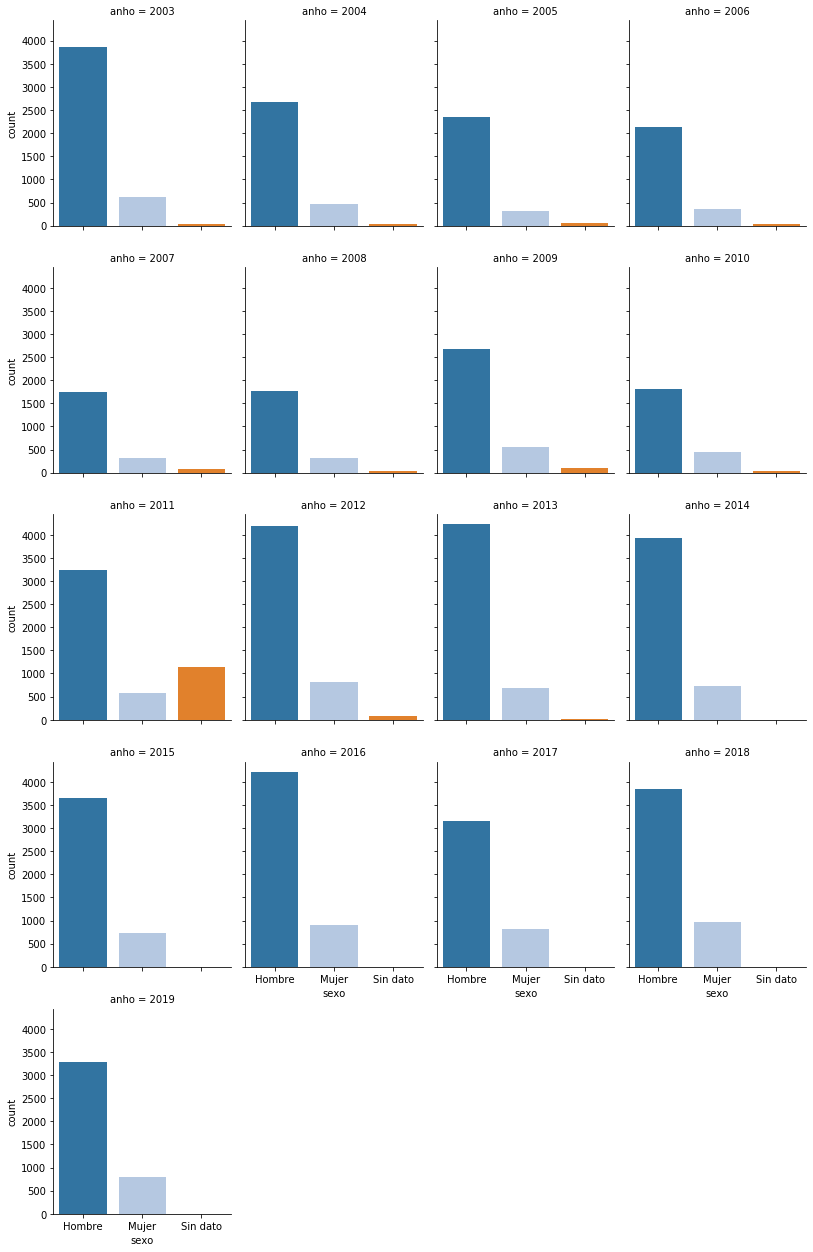

In [34]:
g = sns.catplot("sexo", col="anho", col_wrap=4,
                data=hurtos_moto[hurtos_moto.anho.notnull()],
                kind="count", height=3.5, aspect=.8, 
                palette='tab20')
plt.show()

In [35]:
#Conteo de hurto por edad de victima
hurtos_moto.groupby(['edad'])['edad'].count()

edad
-1     1816
 1       10
 3        1
 4        1
 5        1
 6        1
 8        3
 10       2
 11       1
 13       2
 14       7
 15      27
 16     118
 17     441
 18    1026
 19    1675
 20    2469
 21    2807
 22    3093
 23    3346
 24    3305
 25    4291
 26    3337
 27    3270
 28    3009
 29    2714
 30    2907
 31    2183
 32    2255
 33    1994
 34    1744
 35    1994
 36    1532
 37    1372
 38    1332
 39    1170
 40    1026
 41     892
 42     852
 43     810
 44     655
 45     650
 46     575
 47     553
 48     517
 49     431
 50     377
 51     324
 52     311
 53     293
 54     243
 55     179
 56     167
 57     129
 58     115
 59      97
 60      81
 61      57
 62      58
 63      41
 64      35
 65      39
 66      18
 67      16
 68      17
 69       7
 70      10
 71       9
 72       3
 73       4
 74       3
 75       5
 76       3
 77       2
 78       1
 79       1
 88       1
 94       1
 95       2
 99       3
Name: edad, dtype: int64

In [36]:
#Conteo por medio de transporte
hurtos_moto.groupby(['medio_transporte'])['medio_transporte'].count()

medio_transporte
Autobus                          16
Automóvil                       152
Bicicleta                         9
Caminata                      24370
Motocicleta                   27395
Motocicleta con parrillero       90
Sin dato                      12794
Taxi                             43
Name: medio_transporte, dtype: int64

In [37]:
#Conteo por modalidad
hurtos_moto.groupby(['modalidad'])['modalidad'].count()

modalidad
Abuso de confianza                         48
Atraco                                  25757
Descuido                                  322
Desvalijar o descuartizar                   2
Enfrentamiento con la fuerza pública        2
Engaño                                    553
Escopolamina                              121
Halado                                  33535
Llave maestra                             137
Miedo o terror                             13
Sin dato                                 4366
Suplantación                                5
Taquillazo                                  2
Tóxico o agente químico                     5
Vehículo                                    1
Name: modalidad, dtype: int64

In [38]:
#Conteo conducta especial
hurtos_moto.groupby(['conducta_especial'])['conducta_especial'].count()

conducta_especial
A bus de servicio público                  5
A taxista                                  2
A vehículo repartidor                      2
Adulteración                               1
Carcelaria                                 1
De Aeronave                                2
De Hidrocarburo                            3
De cable                                   8
De celular                                69
Desplazamiento forzado                     2
Extorsión                                  5
Falsificación                              5
Fleteo                                    24
Grupo delincuencial                     1497
Hostigamiento                              9
Incursión                                  2
Medios informáticos                        2
Muerte o lesión de delincuente             4
No                                     27154
Paro o protesta                            2
Paseo millonario                           2
Piratería                            

In [39]:
#Conteo arma medio
hurtos_moto.groupby(['arma_medio'])['arma_medio'].count()

arma_medio
Arma cortopunzante      857
Arma de fuego         24057
Escopolamina            127
Llave maestra         26076
No                     3435
Objeto contundente     1323
Sin dato               8994
Name: arma_medio, dtype: int64

In [40]:
#Conteo por barrio
hurtos_moto.groupby(['nombre_barrio'])['nombre_barrio'].count()

nombre_barrio
Aguas Frias                                 14
Aldea Pablo VI                              12
Alejandro Echavarría                       350
Alejandría                                  40
Alfonso López                              302
Altamira                                   383
Altavista                                  113
Altavista Sector Central                     8
Altos del Poblado                           35
Andalucía                                   66
Antonio Nariño                              94
Aranjuez                                   695
Asomadera No.1                              77
Asomadera No.2                              24
Asomadera No.3                               3
Astorga                                     36
Aures No.1                                 248
Aures No.2                                 231
B. Cerro el Volador                         69
Barrio Caycedo                             526
Barrio Colombia                            188

In [41]:
#Conteo por comuna
hurtos_moto.groupby(['codigo_comuna'])['codigo_comuna'].count()

codigo_comuna
1            266
2            204
3            759
4           1259
5           1428
6            678
7           1499
8            859
9           1186
10          2679
11           894
12           752
13           454
14           409
15           803
16          1031
50             5
60           330
70            20
80           147
90            55
1            509
10          9492
11          4111
12          2352
13           962
14          1330
15          2109
16          3722
2            459
3           2066
4           5201
5           4202
50             7
6           1357
60           303
7           4129
70            57
8           2433
80           230
9           3282
90            55
SIN DATO     784
Name: codigo_comuna, dtype: int64

In [42]:
#Conteo por barrio en la comuna 10
hurtos_moto.where(hurtos_moto.codigo_comuna == '10').groupby(['nombre_barrio'])['nombre_barrio'].count()

nombre_barrio
Barrio Colón                     292
Bomboná No.1                     407
Boston                          1239
Calle Nueva                      200
Centro Administrativo             59
Corazón de Jesús                 208
El Chagualo                      443
Estación Villa                   332
Guayaquil                        265
Hospital San Vicente de Paúl      69
Jesús Nazareno                   359
La Alpujarra                     109
La Candelaria                   1293
Las Palmas                       218
Los Ángeles                      598
Perpetuo Socorro                 368
Prado                           1651
San Benito                       516
San Diego                        237
Sin dato 10 La Candelaria          5
Villa Nueva                      624
Name: nombre_barrio, dtype: int64

In [43]:
#Conteo por edad en la comuna 10
hurtos_moto.where(hurtos_moto.codigo_comuna == '10').groupby(['edad'])['edad'].count()

edad
-1.0     262
 1.0       1
 13.0      2
 15.0      3
 16.0     16
 17.0     43
 18.0     99
 19.0    164
 20.0    270
 21.0    345
 22.0    395
 23.0    437
 24.0    397
 25.0    626
 26.0    494
 27.0    482
 28.0    476
 29.0    367
 30.0    495
 31.0    332
 32.0    357
 33.0    352
 34.0    278
 35.0    308
 36.0    271
 37.0    208
 38.0    203
 39.0    210
 40.0    189
 41.0    151
 42.0    145
 43.0    142
 44.0    106
 45.0    105
 46.0    108
 47.0    105
 48.0     83
 49.0     67
 50.0     47
 51.0     56
 52.0     36
 53.0     41
 54.0     52
 55.0     26
 56.0     21
 57.0     18
 58.0     20
 59.0     24
 60.0     19
 61.0      8
 62.0      8
 63.0      4
 64.0      6
 65.0      4
 66.0      1
 67.0      3
 68.0      2
 94.0      1
 99.0      1
Name: edad, dtype: int64

In [44]:
#Conteo por lugar de robo
hurtos_moto.groupby(['lugar'])['lugar'].count()

lugar
Aeropuerto                                                  6
Almacén tienda y otro                                     330
Banco                                                      75
Bar o cantina                                             116
Biblioteca                                                  7
Billar                                                      3
Bodega                                                     12
Bus de servicio público                                     3
Cafetería                                                   2
Café internet                                               1
Cantera                                                     1
Casa o apartamento                                         84
Caseta de vigilancia empresa                                1
Caseta vigilancia conjunto residencial                      3
Cementerio                                                 23
Centro comercial                                          232
Ce

In [45]:
#Conteo por sede receptora
hurtos_moto.groupby(['sede_receptora'])['sede_receptora'].count()

sede_receptora
Aranjuez                                                      6017
Bello                                                           34
Belén                                                         7319
Buenos Aires                                                  2143
Candelaria                                                   11691
Castilla                                                     10816
Copacabana                                                       3
Doce de Octubre                                               2714
Envigado                                                        15
Itagüí                                                          54
Laureles                                                      7234
Manrique                                                      2891
Poblado                                                       1643
Popular                                                        721
Sabaneta                                       

In [46]:
#Conteo modelo de motos robadas
hurtos_moto.groupby(['modelo'])['modelo'].count()

modelo
-1       14565
 1961        1
 1964        1
 1966        3
 1967        3
 1970        9
 1972        2
 1973       22
 1974        6
 1975        8
 1976      122
 1977      140
 1978      459
 1979      217
 1980      428
 1981      150
 1982      196
 1983      123
 1984      119
 1985       71
 1986      111
 1987      108
 1988      105
 1989      151
 1990      208
 1991      210
 1992      391
 1993      608
 1994      954
 1995     1556
 1996     1503
 1997     1373
 1998     1960
 1999     1172
 2000     1049
 2001      866
 2002      999
 2003     1320
 2004     1540
 2005     2404
 2006     3417
 2007     2803
 2008     2900
 2009     2002
 2010     2072
 2011     2576
 2012     3163
 2013     3166
 2014     4086
 2015     3451
Name: modelo, dtype: int64

In [47]:
#Conteo por color de motos robadas
hurtos_moto.groupby(['color'])['color'].count()

color
Amarillo      858
Azul        11419
Beige         115
Blanco       8924
Bronce          3
Café          627
Gris         4254
Morado        863
Naranja       603
Negro       24346
Oro            90
Plata         543
Rojo         8513
Rosado         28
Sin dato     1511
Verde        2172
Name: color, dtype: int64

## *Data quality summary*
***

In [72]:
#Quitando valores nulos de longitud, agregando una longitud por su codigo de comuna 
mask = hurtos_moto['longitud'].isnull()
hurtos_moto.loc[mask, 'longitud'] = hurtos_moto.loc[mask, 'codigo_comuna'].map({'1':'-75.555154', '10':'-75.58253', '11':'-75.608462', '12':'-75.618306', '13':'-75.631747', '14':'-75.583424', '15':'-75.640638', '16':'-75.642298', '2':'-75.562128', '3':'-75.556216','4':'-75.571982','5':'-75.63825','50':'-75.697725','6':'-75.586393','60':'-75.662729','7':'-75.648569','70':'-75.636862','8':'-75.560645','80':'-75.686965','9':'-75.566076','90':'-75.560075'})

In [73]:
#Quitando valores nulos de latitud, agregando una latitud por su codigo de comuna 
mask = hurtos_moto['latitud'].isnull()
hurtos_moto.loc[mask, 'latitud'] = hurtos_moto.loc[mask, 'codigo_comuna'].map({'1':'6.284947', '10':'6.195974', '11':'6.237585', '12':'6.241971', '13':'6.243118', '14':'6.179562', '15':'6.169894', '16':'6.171211', '2':'6.289382', '3':'6.261033','4':'6.261457','5':'6.170967','50':'6.339095','6':'6.285387','60':'6.262944','7':'6.262944','70':'6.199869','8':'6.230281','80':'6.167736','9':'6.214833','90':'6.185117'})

In [74]:
#Cambiar las edades minimas por la media 
threshold = 13 # Todo lo que tenga frecuencia menor que este valor será cambiado a "Otros"
media = hurtos_moto['edad'].mean()
for col in ['edad']:
    
    to_change = hurtos_moto[hurtos_moto[col]<= threshold].index
    hurtos_moto[col].replace(to_change, media, inplace=True)

In [75]:
#Cambiar las edades == -1 por la media 
threshold = -1 # Todo lo que tenga frecuencia menor que este valor será cambiado a "Otros"
media = hurtos_moto['edad'].mean()
for col in ['edad']:
    
    to_change = hurtos_moto[hurtos_moto[col] == threshold].index
    hurtos_moto[col].replace(to_change, media, inplace=True)

In [76]:
#Agrupar esos modelidades con frecuencia pequeña
threshold = .1 # Todo lo que tenga frecuencia menor que este valor será cambiado a "Otros"
for col in ['modalidad']:
    total_count = len(hurtos_moto[col])
    value_counts_perc = hurtos_moto[col].value_counts()/total_count # Specific column
    to_change = value_counts_perc[value_counts_perc <= threshold].index
    hurtos_moto[col].replace(to_change, 'Otros', inplace=True)

In [77]:
### Revisar valores nulos
hurtos_moto[hurtos_moto["latitud"].isna()].head()

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,ocupacion,discapacidad,grupo_especial,medio_transporte,nivel_academico,testigo,conducta,modalidad,caracterizacion,conducta_especial,arma_medio,articulo_penal,categoria_penal,nombre_barrio,codigo_barrio,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha,anho,mes,dia,dia_semana,hora,hora_min_sec,festivos,quincena,week_number,ferias_fiestas
2745,2003-07-03 20:30:00,1.0,NaN,NaN,Mujer,27.0,Soltero(a),Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Hurto de moto,Atraco,Sin dato,Sin dato,Arma de fuego,Sin dato,Sin dato,Sin dato,SIN DATO,SIN DATO,Vehículo particular,Doce de Octubre,Moto,Vehículos de 2 o 4 ruedas,Vehículo,1994,Azul,Sin dato,Sin dato,03-07-2003,2003,7,3,3,20,20:30:00,0,0,27,1
2751,2003-07-03 20:30:00,1.0,NaN,NaN,Mujer,27.0,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Hurto de moto,Otros,Sin dato,Sin dato,Arma de fuego,Sin dato,Sin dato,Sin dato,SIN DATO,SIN DATO,Vehículo particular,Sin dato,Moto,Vehículos de 2 o 4 ruedas,Vehículo,1994,Azul,Sin dato,Sin dato,03-07-2003,2003,7,3,3,20,20:30:00,0,0,27,1
3233,2003-08-07 04:00:00,1.0,NaN,NaN,Hombre,27.0,Soltero(a),Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Hurto de moto,Otros,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,SIN DATO,SIN DATO,Estadero,Villa Hermosa,Moto,Vehículos de 2 o 4 ruedas,Vehículo,1976,Amarillo,Sin dato,Sin dato,07-08-2003,2003,8,7,3,4,04:00:00,0,0,32,1
3252,2003-08-07 04:00:00,1.0,NaN,NaN,Hombre,27.0,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Hurto de moto,Otros,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,SIN DATO,SIN DATO,Estadero,Sin dato,Moto,Vehículos de 2 o 4 ruedas,Vehículo,1976,Amarillo,Sin dato,Sin dato,07-08-2003,2003,8,7,3,4,04:00:00,0,0,32,1
3267,2003-08-08 05:00:00,1.0,NaN,NaN,Hombre,21.0,Soltero(a),Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Hurto de moto,Halado,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,SIN DATO,SIN DATO,Vía pública,Villa Hermosa,Moto,Vehículos de 2 o 4 ruedas,Vehículo,1992,Negro,Sin dato,Sin dato,08-08-2003,2003,8,8,4,5,05:00:00,0,0,32,1


In [78]:
hurtos_moto = hurtos_moto.dropna()

In [79]:
hurtos_moto['lugar'] = hurtos_moto['lugar'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

C:\Users\Paola Fajardo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
### Eliminar Tildes
hurtos_moto['estado_civil'] = hurtos_moto['estado_civil'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
hurtos_moto['medio_transporte'] = hurtos_moto['medio_transporte'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
hurtos_moto['modalidad'] = hurtos_moto['modalidad'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
hurtos_moto['arma_medio'] = hurtos_moto['arma_medio'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
hurtos_moto['nombre_barrio'] = hurtos_moto['nombre_barrio'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
hurtos_moto['codigo_comuna'] = hurtos_moto['codigo_comuna'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
hurtos_moto['lugar'] = hurtos_moto['lugar'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
hurtos_moto['sede_receptora'] = hurtos_moto['sede_receptora'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

C:\Users\Paola Fajardo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Paola Fajardo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Paola Fajardo\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

## *Target variable*
***

In [81]:
hurtos_moto.groupby(['modalidad'])['modalidad'].count()

modalidad
Atraco    25455
Halado    33100
Otros      5554
Name: modalidad, dtype: int64

## *Preprocesado*
***

In [83]:
hurto_preprocesado = hurtos_moto.copy()

In [82]:
cols2encode = [ 'sexo', 'estado_civil', 'grupo_actor', 'actividad_delictiva', 'parentesco',
       'ocupacion', 'discapacidad', 'grupo_especial', 'medio_transporte', 'nivel_academico', 
       'testigo', 'conducta', 'modalidad', 'caracterizacion', 'conducta_especial', 
       'arma_medio', 'articulo_penal', 'categoria_penal', 'nombre_barrio', 'codigo_barrio', 
       'codigo_comuna', 'lugar', 'sede_receptora', 'bien', 'categoria_bien', 
       'grupo_bien', 'modelo', 'color', 'permiso','unidad_medida']

In [84]:
for idx, value in enumerate (cols2encode):
    ordinal_label = {k: i for i, k in enumerate(hurto_preprocesado[value].unique(), 0)}
    hurto_preprocesado[value] = hurto_preprocesado[value].map(ordinal_label)

In [85]:
hurto_preprocesado.head(5)

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,ocupacion,discapacidad,grupo_especial,medio_transporte,nivel_academico,testigo,conducta,modalidad,caracterizacion,conducta_especial,arma_medio,articulo_penal,categoria_penal,nombre_barrio,codigo_barrio,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha,anho,mes,dia,dia_semana,hora,hora_min_sec,festivos,quincena,week_number,ferias_fiestas
0,2017-01-01 23:00:00,1.0,6.26804,-75.5499,0,29.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,01-01-2017,2017,1,1,6,23,23:00:00,1,1,52,0
1,2017-01-01 20:30:00,1.0,6.29008,-75.5569,0,29.461293,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1,0,1,0,0,0,1,1,0,0,01-01-2017,2017,1,1,6,20,20:30:00,1,1,52,0
2,2017-01-01 07:00:00,1.0,6.30419,-75.5518,0,23.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,0,1,0,0,0,2,2,0,0,01-01-2017,2017,1,1,6,7,07:00:00,1,1,52,0
3,2017-01-01 09:00:00,1.0,6.248,-75.5748,0,-1.000000,2,0,0,0,0,0,0,1,0,0,0,1,0,1,2,0,0,3,3,2,1,2,0,0,0,3,3,0,0,01-01-2017,2017,1,1,6,9,09:00:00,1,1,52,0
4,2017-01-01 16:30:00,1.0,6.26813,-75.5579,0,34.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,3,2,3,0,0,0,4,3,0,0,01-01-2017,2017,1,1,6,16,16:30:00,1,1,52,0


In [86]:
hurto_preprocesado.shape, hurtos_moto.shape

((64109, 46), (64109, 46))

In [87]:
hurto_preprocesado.to_csv("hurto_motos_dummy_exploratorio.csv", sep=';', index=False)
hurtos_moto.to_csv("hurto_motos_categorica_exploratorio.csv", sep=';', index=False)